## Advanced Linear Regression

### EDA (Exploratory Data Analysis)

In [53]:
from sklearn.datasets import load_breast_cancer
import pandas as pd

# Load dataset
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target  # Binary target: 0 (benign), 1 (malignant)

In [54]:
X.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


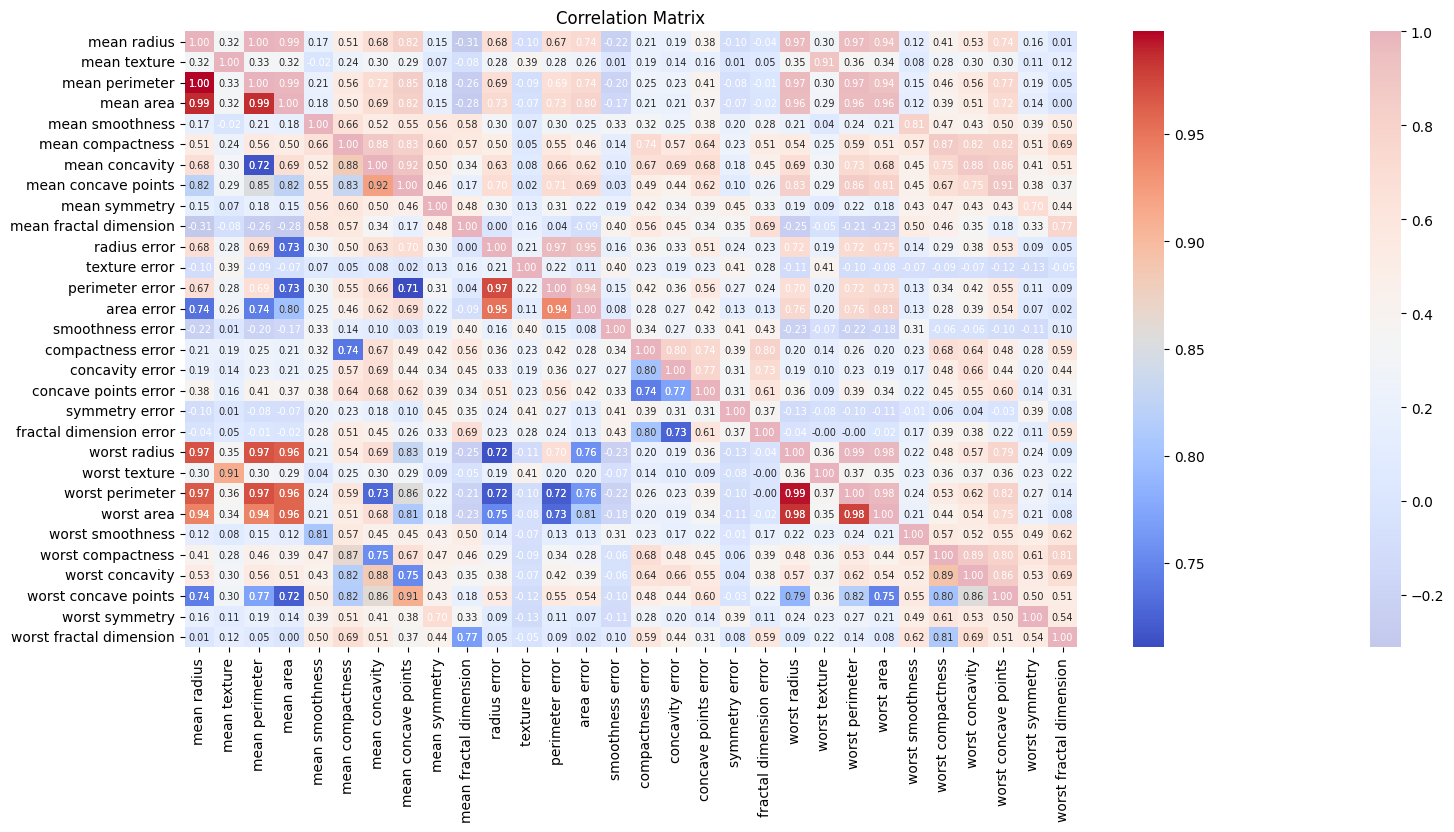

In [55]:
# Plot correlation matrix with highlighted high correlations
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Create correlation matrix
corr_matrix = X.corr()
mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)] = True  # Mask upper triangle to avoid redundancy
mask[np.abs(corr_matrix) < 0.7] = True   # Mask correlations below threshold

plt.figure(figsize=(18, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', 
            annot_kws={"size": 7}, alpha=0.3)
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='coolwarm', 
            fmt='.2f', annot_kws={"size": 7})
plt.title('Correlation Matrix')
plt.show()

we can see that some parameters have high colinearity and that can cause issues in regression. The highly-correlated parameters are (mean radius - mean area - mean perimeter) and (worst radius - worst perimeter - worst area). We can run a PCA to get rid of colinearity issues

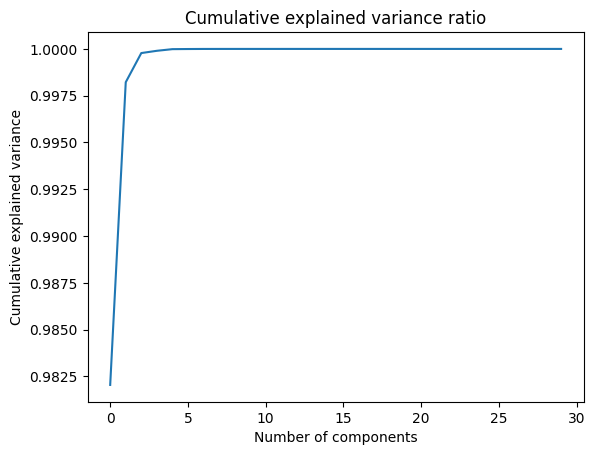

In [62]:
#can we apply PCA to reduce the dimensionality?
from sklearn.decomposition import PCA
pca = PCA()
X_pca = pca.fit_transform(X)

eigenvalues = pca.explained_variance_
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance_ratio = np.cumsum(explained_variance_ratio)

plt.plot(cumulative_explained_variance_ratio)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.title('Cumulative explained variance ratio')
plt.show()


5 components seem to be reasonable to contain most of the information in the dataset

In [64]:
pca = PCA(n_components=5)
X_pca = pca.fit_transform(X)
X_pca = pd.DataFrame(X_pca,columns=["PCA1","PCA2","PCA3","PCA4","PCA5"])
X_pca.describe()

,PCA1,PCA2,PCA3,PCA4,PCA5
count,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02
mean,-7.032999e-14,-5.386638e-13,-3.908609e-14,-5.364660e-14,2.457554e-14
std,6.661701e+02,8.549912e+01,2.652987e+01,7.392478e+00,6.315854e+00
min,-8.631423e+02,-6.715323e+02,-6.629304e+01,-3.253408e+01,-3.200049e+01
25%,-4.361926e+02,-3.122763e+01,-1.109706e+01,-4.658712e+00,-3.867229e+00
50%,-2.160549e+02,-3.821966e-01,-1.112880e+00,-7.247978e-01,-3.018930e-01
75%,2.326157e+02,3.146797e+01,8.843536e+00,4.499185e+00,3.296562e+00
max,3.867178e+03,7.396209e+02,3.517681e+02,2.757122e+01,2.382460e+01



a) radius (mean of distances from center to points on the perimeter)

b) texture (standard deviation of gray-scale values)

c) perimeter

d) area

e) smoothness (local variation in radius lengths)

f) compactness (perimeter^2 / area - 1.0)

g) concavity (severity of concave portions of the contour)

h) concave points (number of concave portions of the contour)

i) symmetry

j) fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst"/"largest" (mean of the three
largest values) of these features were computed for each image,
resulting in 30 features. For instance, field 3 is Mean Radius, field
13 is Radius SE, field 23 is Worst Radius.


The error is the standard error of the 10 measurements, the mean is the mean of the 10 values on the cell nuclei segmentation and the worst is the largest value. The standard error is defined as
$$
\sigma/\sqrt{n}
$$
which means high error large standard deviation (a lot of variability)


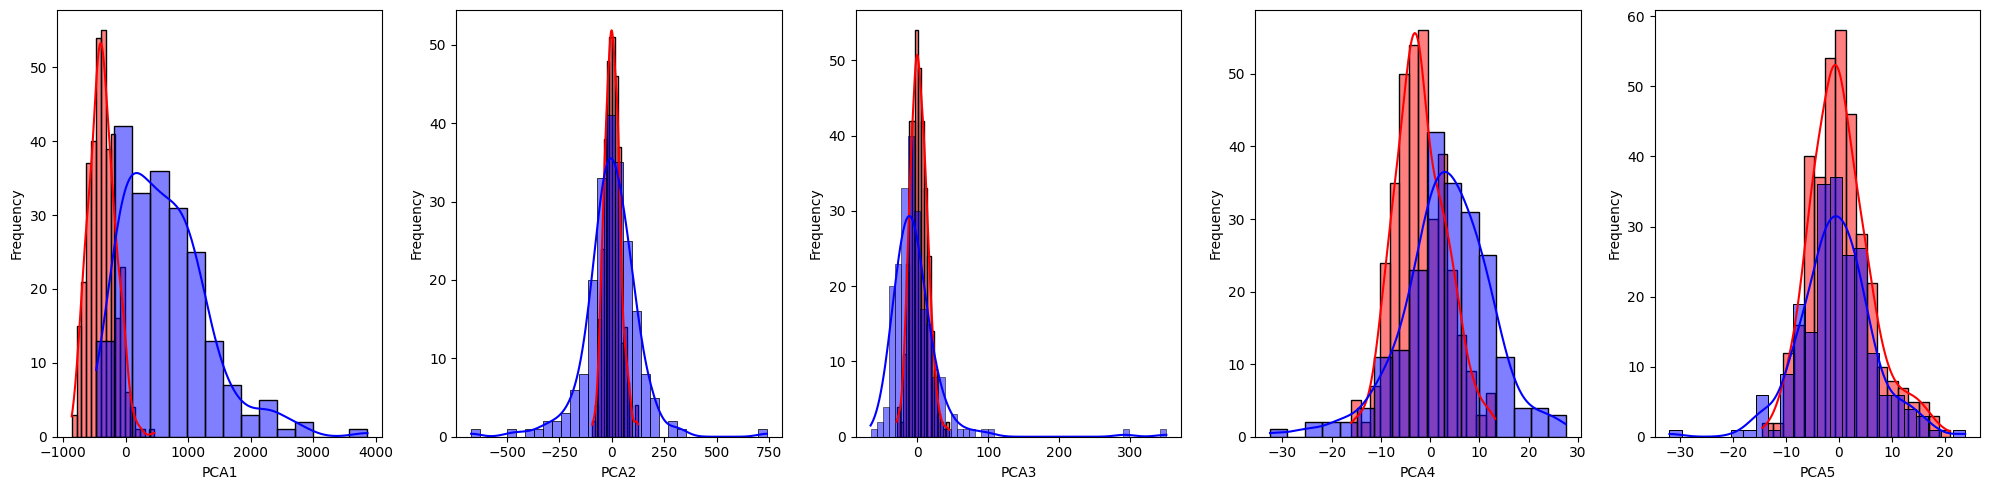

In [71]:
fig, ax = plt.subplots(figsize=(20, 5),nrows=1,ncols=5)
ax = ax.flatten()
malignant_index = np.where(y==1)[0]
benign_index = np.where(y==0)[0]
for i,var in enumerate(X_pca.columns):
    values = X_pca[var].values
    sns.histplot(values[malignant_index], ax=ax[i],kde=True,color='red',alpha=0.5)
    sns.histplot(values[benign_index], ax=ax[i],kde=True,color='blue',alpha=0.5)
    ax[i].set_xlabel(var)
    ax[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

Note that seems that malignant cells have a lower error meaning the values are less far apart from the mean. Specially in radius and area

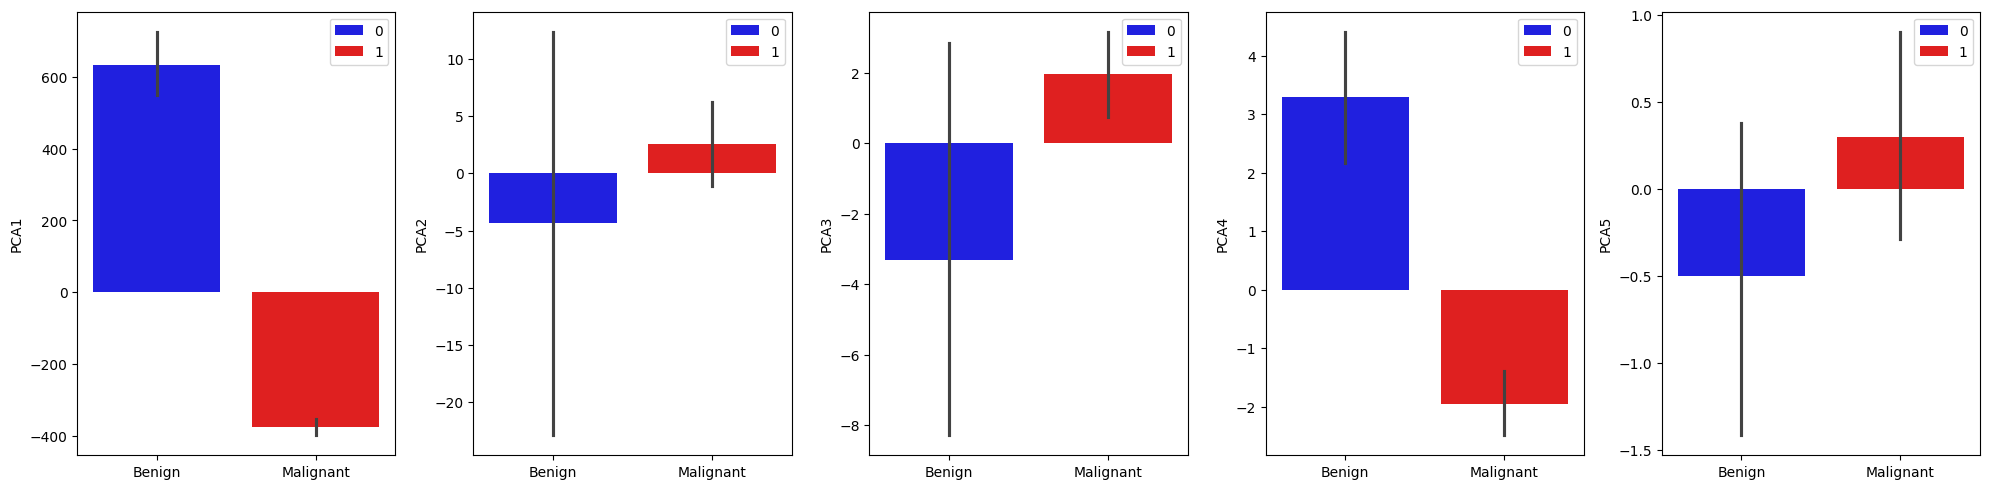

In [72]:
fig, ax = plt.subplots(figsize=(20, 5),nrows=1,ncols=5)
ax = ax.flatten()
for i,var in enumerate(X_pca.columns):
    sns.barplot(x=y,y=X_pca[var],ax=ax[i],hue=y,palette=['blue','red'])
    #ax[i].set_xticks([],labels=["Benign","Malignant"])
    ax[i].set_xticks([0,1],labels=["Benign","Malignant"])
    ax[i].set_ylabel(var)
plt.tight_layout()
plt.show()

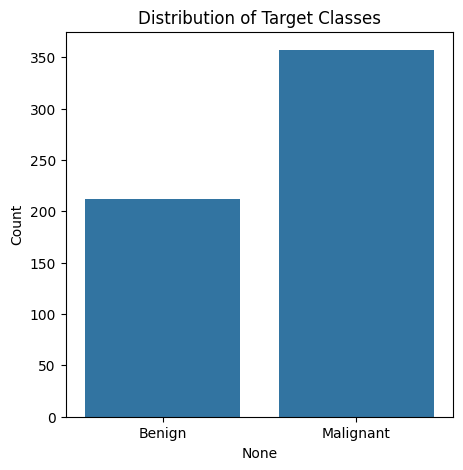

In [73]:
plt.figure(figsize=(5,5))
sns.barplot(x=pd.Series(y).value_counts().index, y=pd.Series(y).value_counts().values)
plt.title('Distribution of Target Classes')
plt.xticks(ticks=[0,1],labels=["Benign","Malignant"])
plt.ylabel('Count')
plt.show()


Logistic regression for now (univariate, for now one feature)

$$
y = \sigma (b + \sum_i^N w_i x_i)
$$

where N is the number of input features and $\sigma$ is the sigmoid function

In [74]:
import torch
import torch.nn as nn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

#we assume only 1 output (1 feature out)
class logistic_regression(nn.Module):
    def __init__(self, input_size, output_size=1):
        super().__init__()
        self.linear = nn.Linear(input_size, output_size)
        self.sigmoid = nn.Sigmoid()

    #forward pass the input through the linear layer and then through the sigmoid (maps from 0 to 1 logit)
    def forward(self, x):
        return self.sigmoid(self.linear(x))

Before running the model we need to normalize the initial parameters. Note that actually there are no categorical/temporal variables

In [87]:
from sklearn.preprocessing import StandardScaler

X_numpy = X_pca.to_numpy()
y_numpy = np.array(y,dtype=np.int64)

X_scaler = StandardScaler()
X_numpy = X_scaler.fit_transform(X_numpy)

X_train, X_test, y_train, y_test = train_test_split(X_numpy, y_numpy, test_size=0.2, random_state=42)

X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

torch.Size([455, 5]) torch.Size([114, 5]) torch.Size([455]) torch.Size([114])


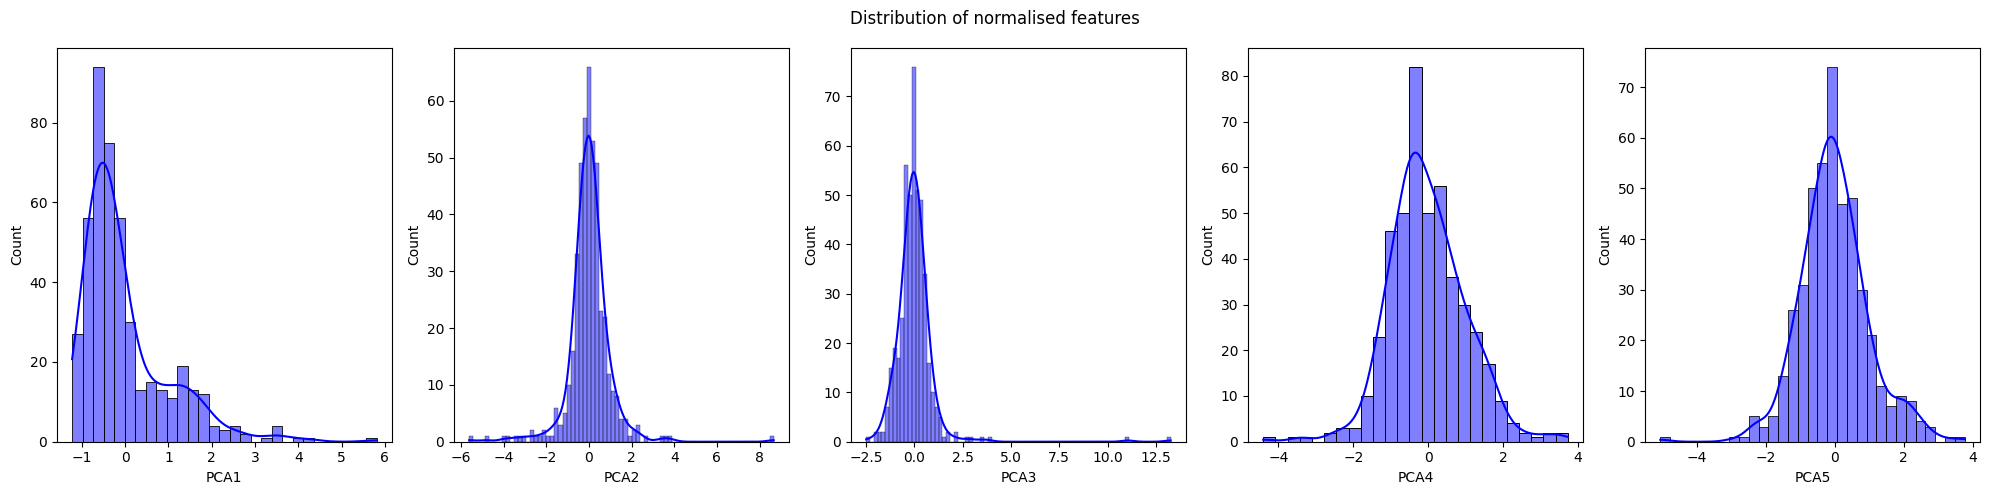

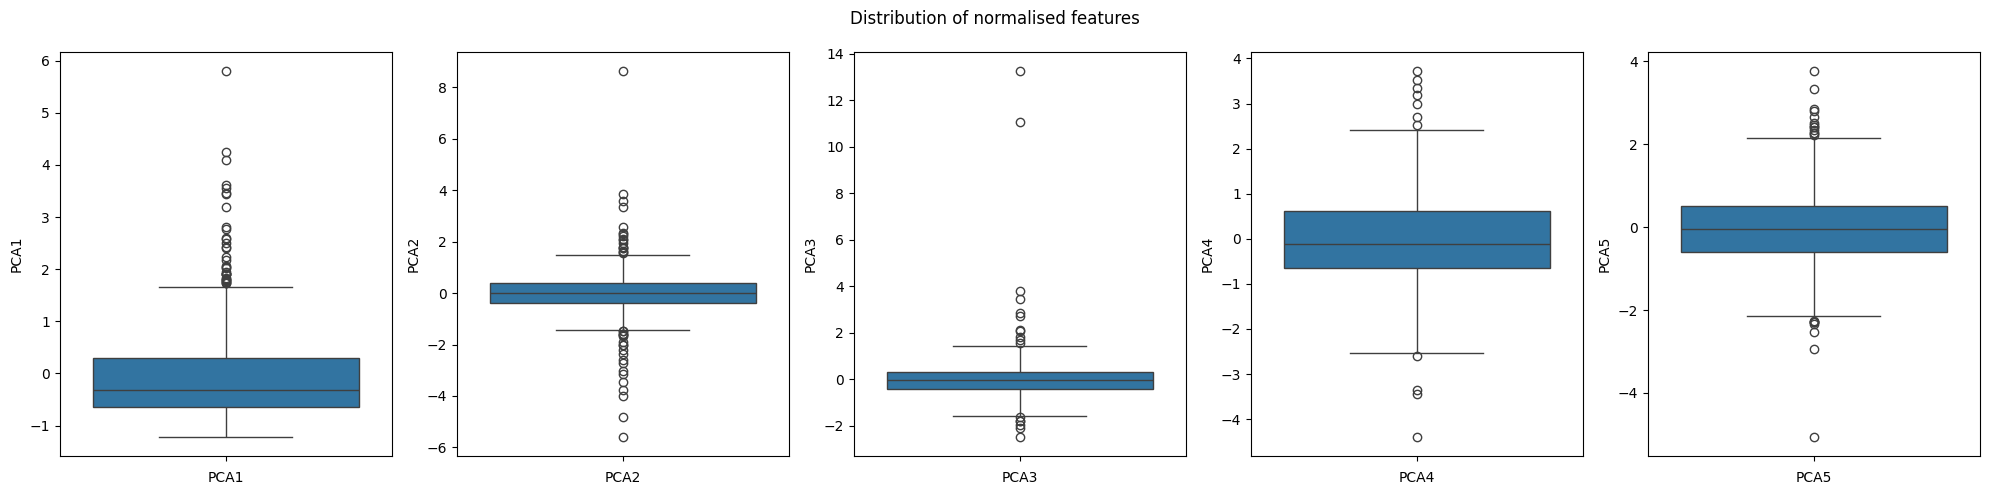

In [88]:
X_train_df = pd.DataFrame(X_train.numpy(),columns=X_pca.columns)

fig, ax = plt.subplots(figsize=(20, 5),nrows=1,ncols=5)
ax = ax.flatten()
for i,feature in enumerate(X_train_df.columns):
    sns.histplot(X_train_df[feature],kde=True,color='blue',alpha=0.5,ax=ax[i])
    ax[i].set_xlabel(feature)

plt.suptitle('Distribution of normalised features')
plt.tight_layout()
plt.show()

fig, ax = plt.subplots(figsize=(20, 5),nrows=1,ncols=5)
ax = ax.flatten()
for i,feature in enumerate(X_train_df.columns):
    sns.boxplot(y=X_train_df[feature],ax=ax[i])
    ax[i].set_xlabel(feature)

plt.suptitle('Distribution of normalised features')
plt.tight_layout()
plt.show()


We notice some outliers but for now we will keep those, we might clip them later... if the convergence is affected 

In [109]:
from tqdm import tqdm

def loss_function(y_pred, y_true):
    #binary cross entropy
    return nn.BCELoss()(y_pred, y_true)

def accuracy(y_pred, y_true):
    return (y_pred==y_true).sum()/len(y_true)

def train(model, optimizer, X_train, y_train, X_test, y_test, epochs=100, lr=0.01, n_batches=100):
    batch_size = len(X_train)//n_batches
    pbar = tqdm(range(epochs),desc="Training model")
    history = {"train_loss":[], "val_loss":[], "train_metric":[], "val_metric":[]}
    
    #pytorch needs the target to be a 2D tensor, it will take care of the batch dimension
    y_train = y_train.view(-1,1)
    y_test = y_test.view(-1,1)
    
    for k in pbar:
        model.train()
        epoch_train_loss, epoch_train_metric = 0, 0
        for i in range(n_batches):
            #Retrieve batch
            start_idx = i*batch_size
            end_idx = start_idx + batch_size
            X_batch = X_train[start_idx:end_idx]
            y_batch = y_train[start_idx:end_idx]
            
            optimizer.zero_grad()
            y_pred = model(X_batch)
            loss = loss_function(y_pred, y_batch)
            loss.backward()
            optimizer.step()
            
            epoch_train_loss += loss.item()
            epoch_train_metric += accuracy((y_pred>0.5).float(), y_batch)
        
        epoch_train_loss /= n_batches
        epoch_train_metric /= n_batches
        
        #Validation phase
        model.eval()
        with torch.no_grad():
            y_pred = model(X_test)
            val_loss = loss_function(y_pred, y_test)
            val_metric = accuracy((y_pred>0.5).float(), y_test)
        
        history["train_loss"].append(epoch_train_loss)
        history["val_loss"].append(val_loss.item())
        history["train_metric"].append(epoch_train_metric)
        history["val_metric"].append(val_metric)
        
        if k%5==0:
            pbar.set_postfix({
                'Train loss': f'{epoch_train_loss:.4f}',
                'Val loss': f'{val_loss.item():.4f}', 
                'Train acc': f'{epoch_train_metric:.4f}',
                'Val acc': f'{val_metric:.4f}'
            })
    return model, history

model = logistic_regression(input_size=X_train.shape[1])
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
model, history = train(model, optimizer, X_train, y_train, X_test, y_test, epochs=1000, n_batches=3)

Training model: 100%|██████████| 1000/1000 [00:00<00:00, 1290.77it/s, Train loss=0.2260, Val loss=0.1924, Train acc=0.9426, Val acc=0.9649]


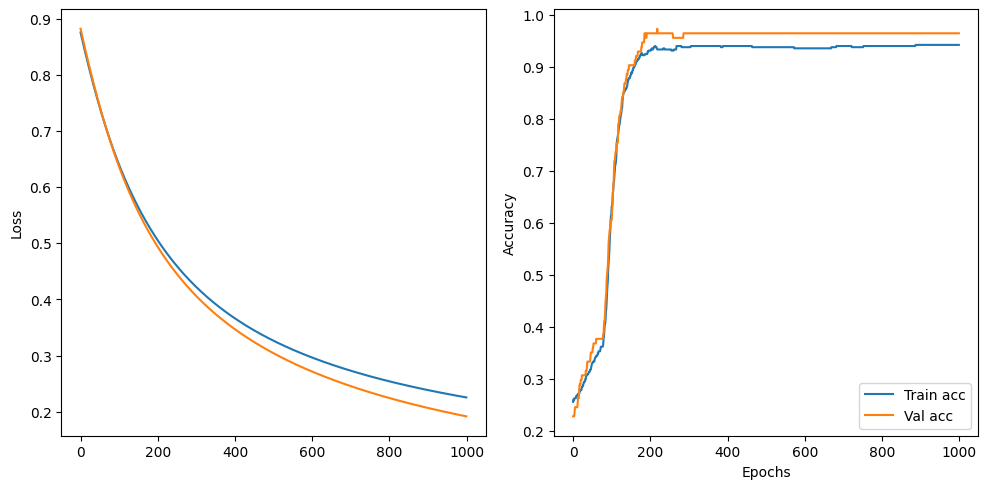

In [112]:
fig, ax = plt.subplots(figsize=(10,5),nrows=1,ncols=2)
ax = ax.flatten()
ax[0].plot(history["train_loss"],label="Train loss")
ax[0].plot(history["val_loss"],label="Val loss")

ax[1].plot(history["train_metric"],label="Train acc")
ax[1].plot(history["val_metric"],label="Val acc")
ax[1].set_xlabel("Epochs")
ax[0].set_ylabel("Loss")
ax[1].set_ylabel("Accuracy")
ax[1].legend()
plt.tight_layout()
plt.show()




<class 'torch.Tensor'>
(114, 5)


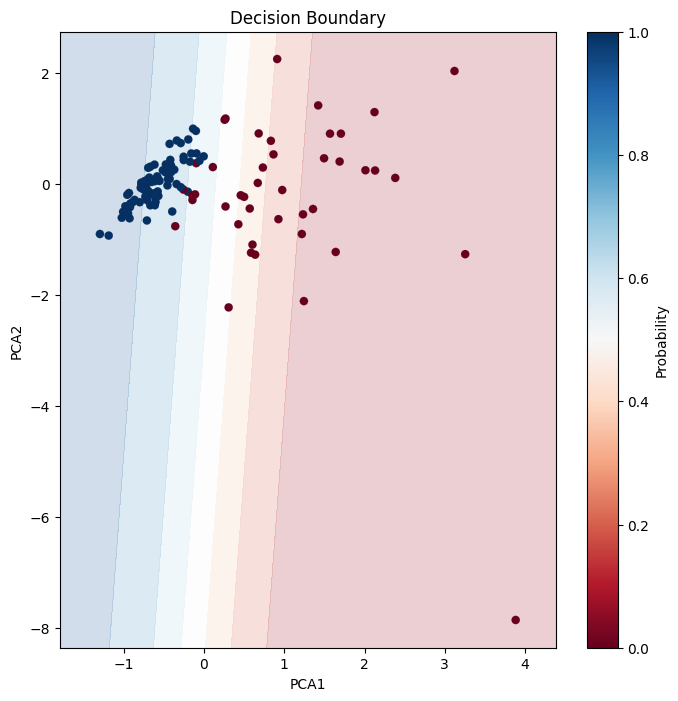

In [163]:
print(type(X_test))
X_test_numpy = X_test.numpy()
print(X_test_numpy.shape)
xmin, xmax = X_test_numpy[:,0].min(), X_test_numpy[:,0].max()
ymin, ymax = X_test_numpy[:,1].min(), X_test_numpy[:,1].max()
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                    np.arange(y_min, y_max, 0.02))
grid = np.zeros((xx.ravel().shape[0], X_test_numpy.shape[1]))
grid[:, 0] = xx.ravel()
grid[:, 1] = yy.ravel()

# Set other features to their mean values
for i in range(X_test_numpy.shape[1]):
    if i != 0 and i != 1:
        grid[:, i] = X_test_numpy[:, i].mean()

# Get predictions
grid_tensor = torch.tensor(grid, dtype=torch.float32)
with torch.no_grad():
    Z = model(grid_tensor)

Z = Z.numpy().reshape(xx.shape)
plt.figure(figsize=(8, 8))
plt.contourf(xx, yy, Z, alpha=0.2, cmap='RdBu')
plt.scatter(X_test_numpy[:,0],X_test_numpy[:,1],c=y_test,cmap='RdBu',linewidth=0.1)
plt.colorbar(label='Probability')
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.title('Decision Boundary')
plt.show()

{}
AAB {'AAB': True}
AA {'AAB': True, 'AA': True}
AB {'AAB': True, 'AA': True, 'AB': True}
A {'AAB': True, 'AA': True, 'AB': True, 'A': True}
B {'AAB': True, 'AA': True, 'AB': True, 'A': True, 'B': True}
5
